<a href="https://colab.research.google.com/github/PotlachervuSrilatha/Predict_Loan_Approval/blob/main/Predict_Loan_Approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement: Loan Approval Prediction

### **Aim**: To develop a predictive model that can accurately predict whether a loan application will be approved or denied based on various applicant attributes.
**Objectives:**
- Collect and preprocess the loan dataset, handling missing values and encoding categorical variables.
- Explore the dataset to understand the distribution of loan approvals and rejections.
- Train and evaluate different machine learning models such as logistic regression, decision trees, and random forests to predict loan approval status.
- Optimize the selected model by tuning hyperparameters and selecting the best performing features.
- Validate the model's performance using appropriate evaluation metrics

# Importing necessary libraries


In [ ]:
import pandas as pd  # Pandas is a library for data manipulation and analysis
import numpy as np  # NumPy is a library for numerical computing
import seaborn as sns  # Seaborn is a visualization library based on matplotlib
import matplotlib.pyplot as plt  # Matplotlib is a plotting library
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.impute import SimpleImputer  # For handling missing values
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier
from sklearn.metrics import accuracy_score, confusion_matrix  # For evaluating model performance
from scipy.stats import mode

import warnings
warnings.filterwarnings("ignore")

In [ ]:
loan_data=pd.read_csv("/content/Loan_Approval_Prediction.csv")

In [ ]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loan_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
loan_data.shape

(614, 13)

In [ ]:
loan_data.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

In [ ]:
loan_data.kurtosis()

ApplicantIncome      60.540676
CoapplicantIncome    84.956384
LoanAmount           10.401533
Loan_Amount_Term      6.673474
Credit_History        1.548763
dtype: float64

In [ ]:
loan_data.std()

ApplicantIncome      6109.041673
CoapplicantIncome    2926.248369
LoanAmount             85.587325
Loan_Amount_Term       65.120410
Credit_History          0.364878
dtype: float64

In [ ]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# drop the  column
loan_data.drop(columns=['Loan_ID'],inplace=True)

In [ ]:
print('Unique Values for Each Feature: \n')
for i in loan_data.columns:
    print(i, ':',loan_data[i].nunique())

Unique Values for Each Feature: 

Gender : 2
Married : 2
Dependents : 4
Education : 2
Self_Employed : 2
ApplicantIncome : 505
CoapplicantIncome : 287
LoanAmount : 203
Loan_Amount_Term : 10
Credit_History : 2
Property_Area : 3
Loan_Status : 2


In [ ]:
# Loop through each column in the DataFrame that contains object (categorical) data
for col in loan_data.select_dtypes(include='object').columns:
    print(col)  # Print the name of the column
    print(loan_data[col].unique())  # Print the unique values in the column


Gender
['Male' 'Female' nan]
Married
['No' 'Yes' nan]
Dependents
['0' '1' '2' '3+' nan]
Education
['Graduate' 'Not Graduate']
Self_Employed
['No' 'Yes' nan]
Property_Area
['Urban' 'Rural' 'Semiurban']
Loan_Status
['Y' 'N']


In [ ]:
# Selecting numerical columns
numerical_data = loan_data.select_dtypes(include=np.number)
numerical_columns = numerical_data.columns

# Printing numeric features
print("Numeric Features:")
print(numerical_data.head())
print("=" * 80)  # Just to separate the output

# Printing numerical column names
print("Numerical Column Names:")
print(numerical_columns)

Numeric Features:
   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  
0             1.0  
1             1.0  
2             1.0  
3             1.0  
4             1.0  
Numerical Column Names:
Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


- After identifying the missing values of all the features, it turns out that there are quite a lot of them so we need to impute the missing values in each feature. Criteria for imputing data:

- If the feature is categorical (e.g. Gender whose unique values are Male and Female), we can impute it with the most frequently occurring category or its mode value.
- If the feature is numeric (e.g. LoanAmount), we can impute the missing rows by taking the average or median of the whole feature.

**Note:** Before we delete missing data/rows, we should only delete missing data if the number of missing rows is less. Deleting rows can solve the problem of missing data, but it also loses data related to other features in the row.

### Here are suggestions for data imputation on this notebook:

- For "Gender", imputation is done by filling the data with Male (the most common answer).

- For "Married", imputation is done by filling the data with Yes (the most common answer).

- For "Dependents", imputation is done by filling the data with 0 (the most common answer).

- For "Self_Employed", imputation is done by filling the data with No (the most common answer).

- For "LoanAmount", imputation is done by filling the data with its average value.

#Preprocessing tha dataset

In [ ]:
# find the null values
loan_data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#Fill the missing values for Numerical terms- Mean
loan_data["LoanAmount"]=loan_data["LoanAmount"].fillna(loan_data["LoanAmount"].mean())
loan_data["Loan_Amount_Term"]=loan_data["Loan_Amount_Term"].fillna(loan_data["Loan_Amount_Term"].mean())
loan_data["Credit_History"]=loan_data["Credit_History"].fillna(loan_data["Credit_History"].mean())
# Handling missing values in "CoapplicantIncome" column
loan_data["CoapplicantIncome"].fillna(loan_data["CoapplicantIncome"].median(), inplace=True)

In [ ]:
#Fill the missing values for Categorical terms- Mode(MOST COMMON TERN/most frequently occuring values)
loan_data["Gender"]=loan_data["Gender"].fillna(loan_data["Gender"].mode()[0])
loan_data["Married"]=loan_data["Married"].fillna(loan_data["Married"].mode()[0])
loan_data["Dependents"]=loan_data["Dependents"].fillna(loan_data["Dependents"].mode()[0])
loan_data["Self_Employed"]=loan_data["Self_Employed"].fillna(loan_data["Self_Employed"].mode()[0])


In [ ]:
loan_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory Data Analysis

# Categorical Attributes

number of people who take loan as group by Gender:
Male      502
Female    112
Name: Gender, dtype: int64


<Axes: xlabel='count', ylabel='Gender'>

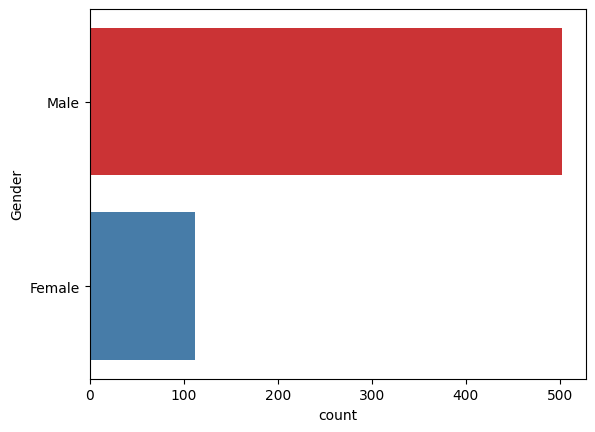

In [ ]:
print("number of people who take loan as group by Gender:")
print(loan_data["Gender"].value_counts())
sns.countplot(loan_data["Gender"],palette="Set1")

number of people who take loan as group by Marital status:
Yes    401
No     213
Name: Married, dtype: int64


<Axes: xlabel='count', ylabel='Married'>

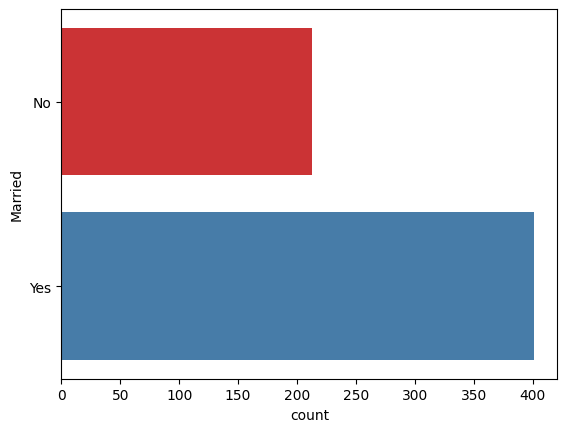

In [ ]:
print("number of people who take loan as group by Marital status:")
print(loan_data["Married"].value_counts())
sns.countplot(loan_data["Married"],palette="Set1")


number of people who take loan as group by Dependents:
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<Axes: xlabel='count', ylabel='Dependents'>

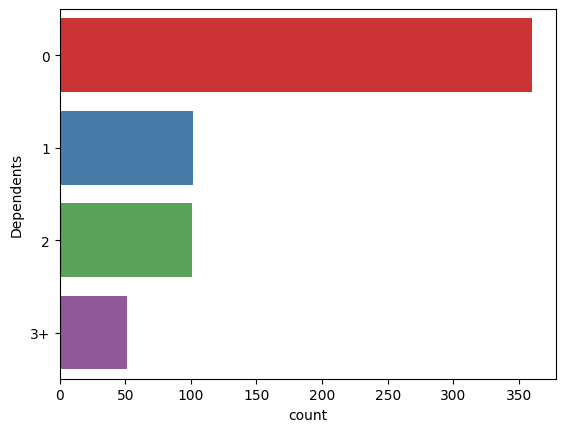

In [ ]:
print("number of people who take loan as group by Dependents:")
print(loan_data["Dependents"].value_counts())
sns.countplot(loan_data["Dependents"],palette="Set1")


number of people who take loan as group by Education:
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


<Axes: xlabel='count', ylabel='Education'>

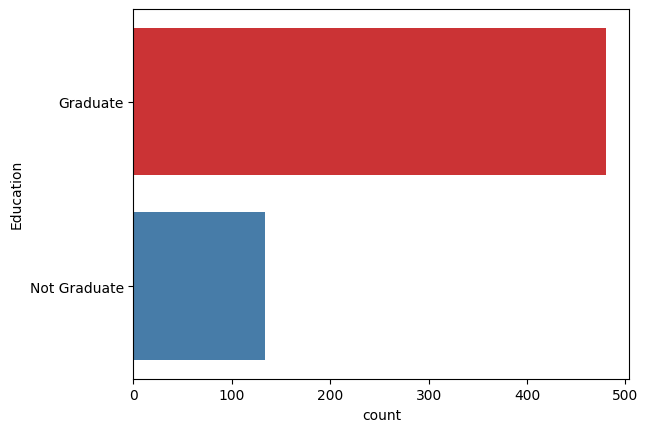

In [ ]:
print("number of people who take loan as group by Education:")
print(loan_data["Education"].value_counts())
sns.countplot(loan_data["Education"],palette="Set1")


number of people who take loan as group by Self_Employed:
No     532
Yes     82
Name: Self_Employed, dtype: int64


<Axes: xlabel='count', ylabel='Self_Employed'>

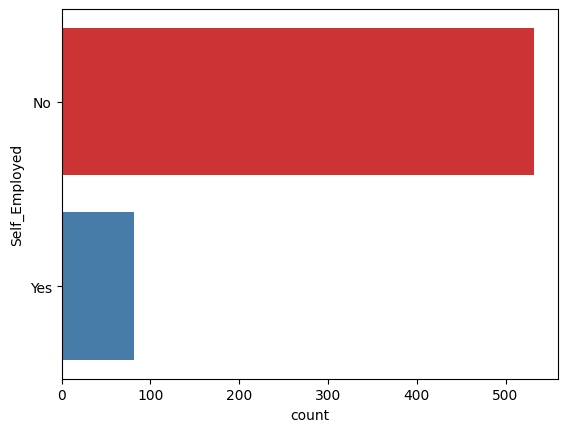

In [ ]:
print("number of people who take loan as group by Self_Employed:")
print(loan_data["Self_Employed"].value_counts())
sns.countplot(loan_data["Self_Employed"],palette="Set1")


number of people who take loan as group by Property_Area:
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


<Axes: xlabel='count', ylabel='Property_Area'>

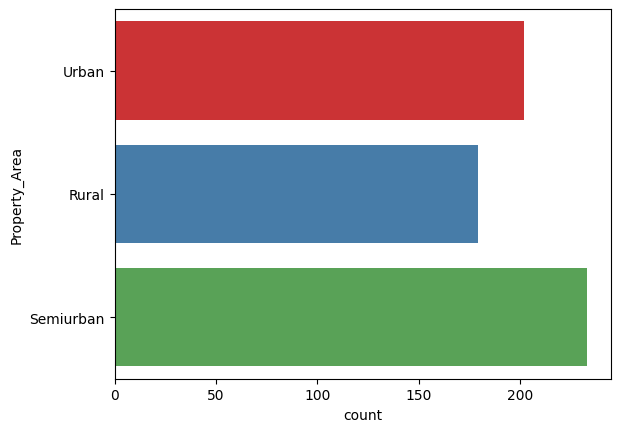

In [ ]:
print("number of people who take loan as group by Property_Area:")
print(loan_data["Property_Area"].value_counts())
sns.countplot(loan_data["Property_Area"],palette="Set1")


number of people who take loan as group by Loan_Status:
Y    422
N    192
Name: Loan_Status, dtype: int64


<Axes: xlabel='count', ylabel='Loan_Status'>

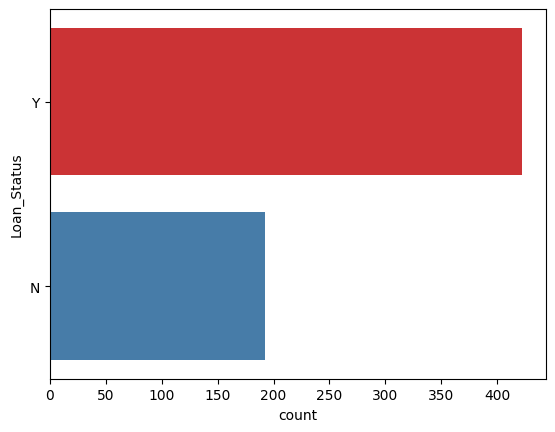

In [ ]:
print("number of people who take loan as group by Loan_Status:")
print(loan_data["Loan_Status"].value_counts())
sns.countplot(loan_data["Loan_Status"],palette="Set1")


# Numerical Attributes

number of people who take loan as group by ApplicantIncome:
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

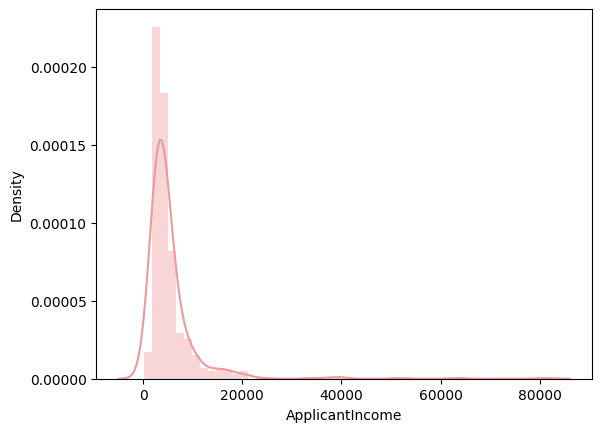

In [ ]:
print("number of people who take loan as group by ApplicantIncome:")
print(loan_data["ApplicantIncome"].value_counts())
sns.distplot(loan_data["ApplicantIncome"],color='#EF9A9A')

number of people who take loan as group by CoapplicantIncome:
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

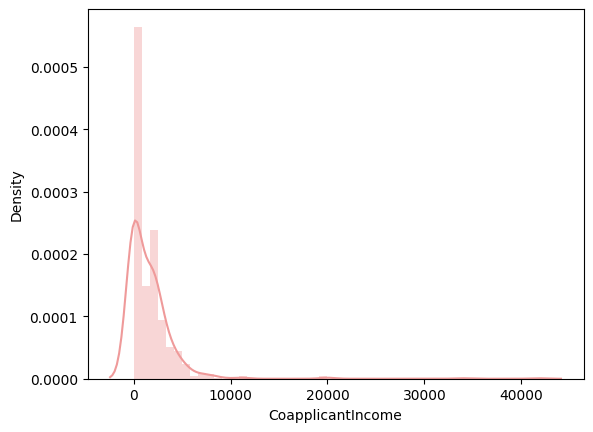

In [ ]:
print("number of people who take loan as group by CoapplicantIncome:")
print(loan_data["CoapplicantIncome"].value_counts())
sns.distplot(loan_data["CoapplicantIncome"],color='#EF9A9A')


number of people who take loan as group by LoanAmount:
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64


<Axes: xlabel='LoanAmount', ylabel='Density'>

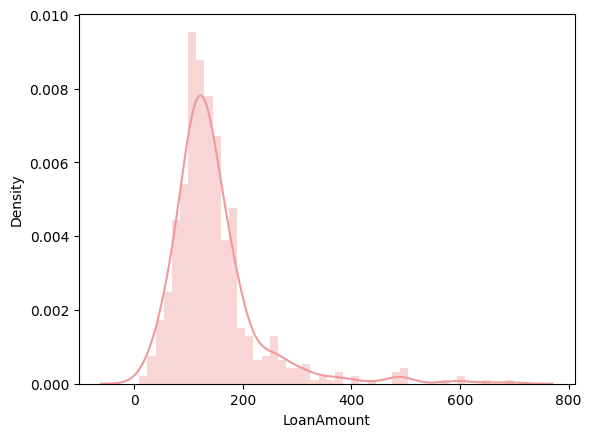

In [ ]:
# Plotting the distribution using displot
print("number of people who take loan as group by LoanAmount:")
print(loan_data["LoanAmount"].value_counts())
sns.distplot(loan_data["LoanAmount"],color='#EF9A9A')


number of people who take loan as group by Loan_Amount_Term:
360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

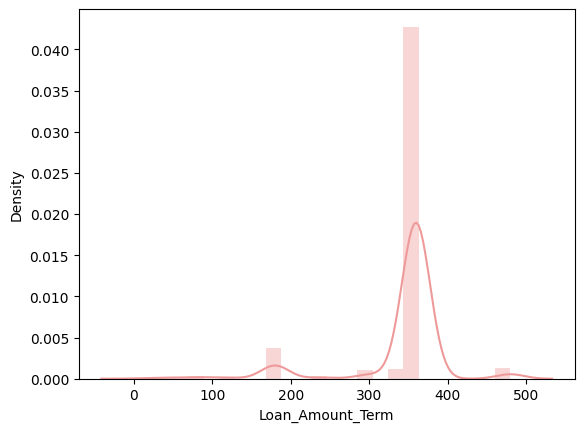

In [ ]:
print("number of people who take loan as group by Loan_Amount_Term:")
print(loan_data["Loan_Amount_Term"].value_counts())
sns.distplot(loan_data["Loan_Amount_Term"],color='#EF9A9A')


number of people who take loan as group by Credit_History:
1.000000    475
0.000000     89
0.842199     50
Name: Credit_History, dtype: int64


<Axes: xlabel='Credit_History', ylabel='Density'>

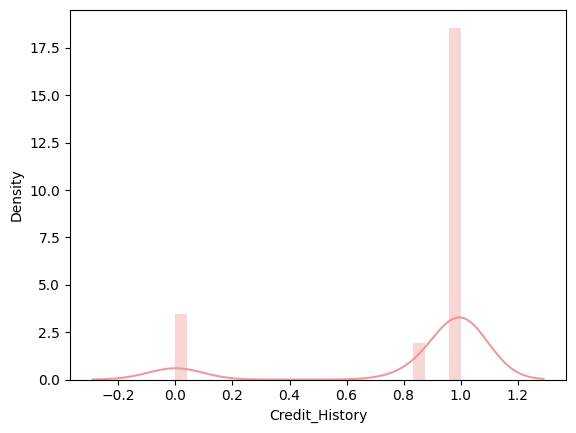

In [ ]:
print("number of people who take loan as group by Credit_History:")
print(loan_data["Credit_History"].value_counts())
sns.distplot(loan_data["Credit_History"],color='#EF9A9A')


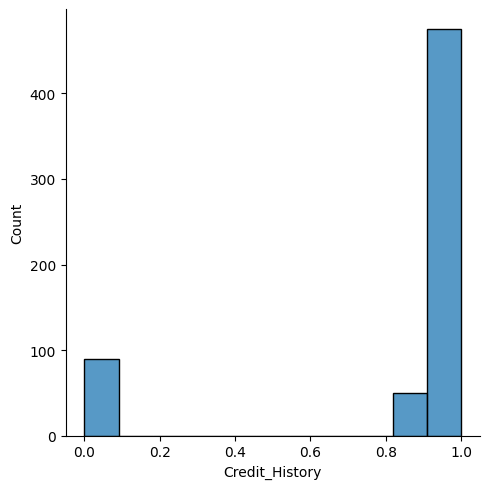

In [ ]:

# Plotting the distribution using displot
sns.displot(loan_data["Credit_History"])

# Creation of New Attributes

In [ ]:
# Total Income
loan_data["Total_Income"]=loan_data["ApplicantIncome"]+loan_data["CoapplicantIncome"]
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


# Apply Log Transformation to the attributes

<Axes: xlabel='Applicant_Income_Log', ylabel='Density'>

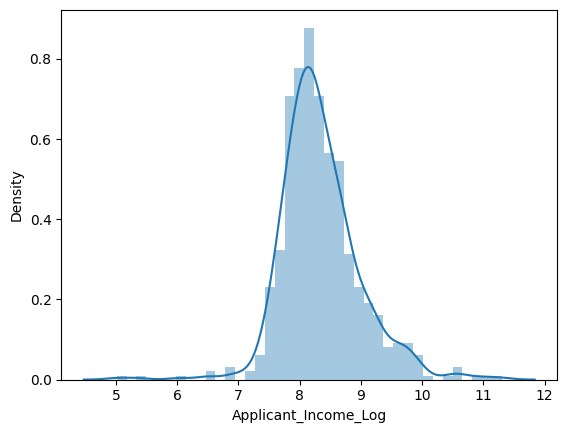

In [ ]:
# Apply Log Transformation to the attribute
loan_data["Applicant_Income_Log"]=np.log(loan_data["ApplicantIncome"])
sns.distplot(loan_data["Applicant_Income_Log"])

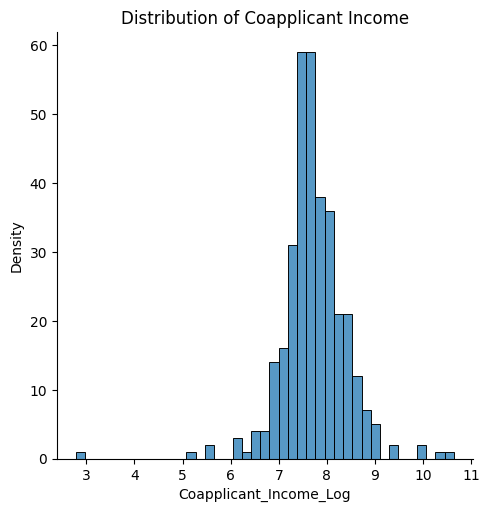

In [ ]:
# Apply Log Transformation to the attribute
loan_data["Coapplicant_Income_Log"]=np.log(loan_data["CoapplicantIncome"])
# Plotting the distribution using displot
sns.displot(loan_data["Coapplicant_Income_Log"])
plt.title('Distribution of Coapplicant Income')
plt.xlabel('Coapplicant_Income_Log')
plt.ylabel('Density')
plt.show()

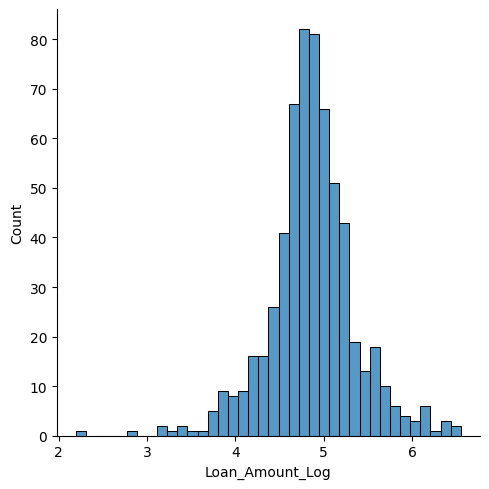

In [ ]:
# Apply Log Transformation to the attribute
loan_data["Loan_Amount_Log"]=np.log(loan_data["LoanAmount"])
# Plotting the distribution using displot
sns.displot(loan_data["Loan_Amount_Log"])

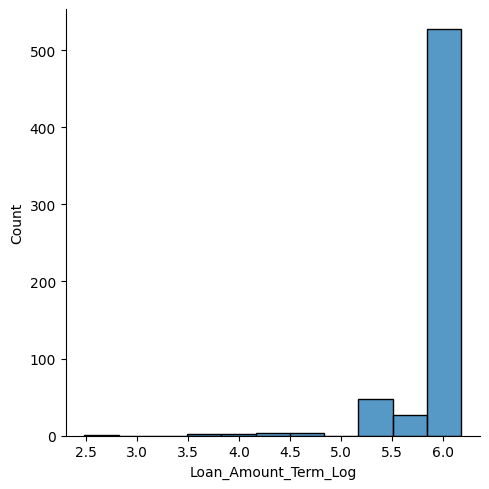

In [ ]:
# Apply Log Transformation to the attribute
loan_data["Loan_Amount_Term_Log"]=np.log(loan_data["Loan_Amount_Term"])
# Plotting the distribution using displot
sns.displot(loan_data["Loan_Amount_Term_Log"])

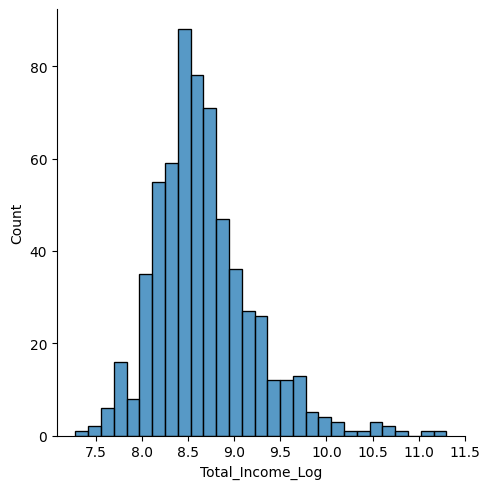

In [ ]:
# Apply Log Transformation to the attribute
loan_data["Total_Income_Log"]=np.log(loan_data["Total_Income"])
# Plotting the distribution using displot
sns.displot(loan_data["Total_Income_Log"])

# Correlation Matrix

The next step is to look at the correlation between features. This is to find out how much correlation each feature has with the target, "Loan_Status", and can also determine the features that can affect the prediction results later. Pearson correlation is applied because it is easier and more widely used. The results of the correlation of each feature will be mapped in a Heatmap graph.

In [ ]:
# correlation coefficient ranges from -1 to 1, where:

# 1 indicates a perfect positive correlation,
# -1 indicates a perfect negative correlation, and
# 0 indicates no correlation.

<Axes: >

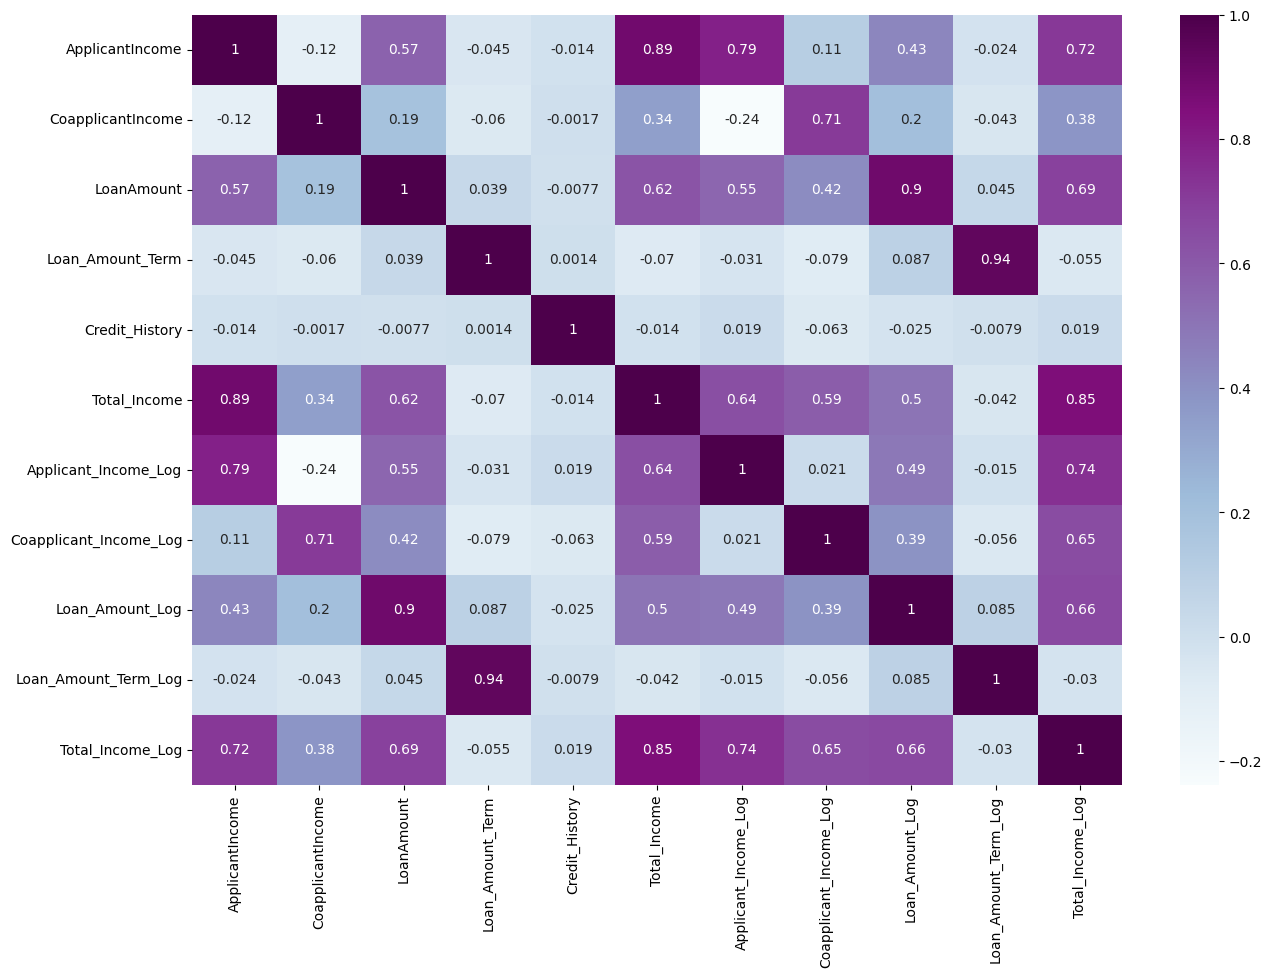

In [ ]:
corr=loan_data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap="BuPu")

From the results obtained, none of the correlation results against the target have a value above 0.7. This indicates a weak correlation or even no correlation between features and the target. Therefore, all these features will be used in predicting the results later.



In [ ]:
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Applicant_Income_Log,Coapplicant_Income_Log,Loan_Amount_Log,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,-inf,4.986426,5.886104,8.674026
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430109,7.318540,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,-inf,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.856707,7.765569,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,-inf,4.948760,5.886104,8.699515


In [ ]:
# Drop Unnecessary columns
cols=["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Total_Income","Coapplicant_Income_Log"]
loan_data=loan_data.drop(columns=cols,axis=1)
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Applicant_Income_Log,Loan_Amount_Log,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,5.886104,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104,8.699515


*** Label Encoding***

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols=["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status","Dependents"]
le=LabelEncoder()
for col in cols:
  loan_data[col]=le.fit_transform(loan_data[col])

In [ ]:
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Applicant_Income_Log,Loan_Amount_Log,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674026,4.986426,5.886104,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,4.852030,5.886104,8.714568
2,1,1,0,0,1,1.0,2,1,8.006368,4.189655,5.886104,8.006368
3,1,1,0,1,0,1.0,2,1,7.856707,4.787492,5.886104,8.505323
4,1,0,0,0,0,1.0,2,1,8.699515,4.948760,5.886104,8.699515


# Train-Test Split

In [ ]:
# Specify Input and Output Attributes
X=loan_data.drop(columns=["Loan_Status"],axis=1)
y=loan_data["Loan_Status"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=42)

# Model Training

#Modeling for Loan Approval Prediction
- In applying machine learning models for loan approval prediction, the use of algorithms can determine the results that will be obtained. In this notebook, the algorithms used are as follows:

- Logistic Regression
- Gaussian Naive Bayes
- Decision Tree
- K-Nearest Neighbor
- Random Forest

Determining the hyperparameter value of each algorithm also affects the results. Therefore, later we will do hyperparameter tuning as well.

In [ ]:
# Classify function
from sklearn.model_selection import cross_val_score
def classify(model, X, y):
  x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
  model.fit(x_train,y_train)
  print("Accuracy is", model.score(x_test,y_test)*100)
  # cross validation- It is used for better validation of model
  # ed: cv=5, train-4,test-1

  score=cross_val_score(model,X,y,cv=5)
  print("Cross validation is", np.mean(score)*100)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
classify(model,X,y)

Accuracy is 77.27272727272727
Cross validation is 80.9462881514061


## Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

model=GaussianNB()
classify(model,X,y)

Accuracy is 77.27272727272727
Cross validation is 79.31627349060376


## Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
classify(model,X,y)

Accuracy is 72.72727272727273
Cross validation is 71.1795281887245


##  K-Nearest Neighbor


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
classify(model, X, y)

Accuracy is 72.07792207792207
Cross validation is 75.56977209116353


## RandomForestClassifier, ExtraTreesClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
model=RandomForestClassifier()
classify(model,X,y)

Accuracy is 77.92207792207793
Cross validation is 78.83113421298147


In [ ]:
model=ExtraTreesClassifier()
classify(model,X,y)

Accuracy is 73.37662337662337
Cross validation is 76.71598027455686


In [ ]:
from sklearn import metrics
from sklearn.svm import SVC


knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators = 7,
                             criterion = 'entropy',
                             random_state =7)
svc = SVC()
lc = LogisticRegression()

# making predictions on the training set
for clf in (rfc, knn, svc,lc):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_train)
    print("Accuracy score of ", clf.__class__.__name__, "=",100*metrics.accuracy_score(y_train,y_pred))


Accuracy score of  RandomForestClassifier = 97.82608695652173
Accuracy score of  KNeighborsClassifier = 86.30434782608695
Accuracy score of  SVC = 70.0
Accuracy score of  LogisticRegression = 82.17391304347827


# Hyperparameter Tuning

In [ ]:
model=RandomForestClassifier(n_estimators=100,min_samples_split=25,max_depth=7,max_features=1)
classify(model,X,y)

Accuracy is 76.62337662337663
Cross validation is 80.29454884712783


**Confusion Matrix**
- A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class.It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.

In [ ]:
model=RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[23, 31],
       [ 5, 95]])

<Axes: >

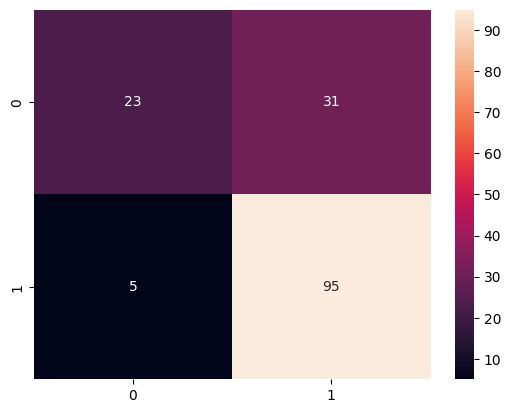

In [ ]:
sns.heatmap(cm,annot=True)

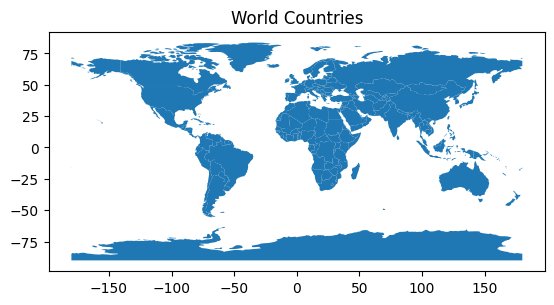

In [ ]:
#Generating world map with simple python code.


import geopandas as gpd
import matplotlib.pyplot as plt

# Download a GeoDataFrame of world countries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the GeoDataFrame
world.plot()
plt.title('World Countries')
plt.show()